# MASTER - Notebook 1
### Matteo Grazioso 884055

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Create a requirements.txt file
!pip freeze > requirements.txt


In [4]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# The file contains the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file 
# path = 'data/raw/validazioni.txt'                     # Period: 2022-05-13 to 2022-07-15
path = 'data/raw/esportazioneCompleta.txt'            # Period: 2023-01-23 to 2023-03-14

df = pd.read_csv(path, header=0, sep='\t')
# Save the name of the file in a variable for future use extracting the name of the file from the path
file_name = path.split('/')[-1].split('.')[0]

In [7]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,13/01/2023 00:00,40834866809772548,162,Stazione MES,12101,Bigl.Aut.75'Mestre/Lido-tsc
1,13/01/2023 00:00,42242241686217732,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
2,13/01/2023 00:00,42242241686217476,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
3,13/01/2023 00:00,-3604990320,5049,"Zattere ""B""",23301,Mens.Studente Rete Unica
4,13/01/2023 00:00,-2824230951,5043,"S. Toma' ""B""",23303,Abb stud. ReteUnica 12 mesi


In [8]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
5537461,14/03/2023 23:58,-2864643315,162,Stazione MES,11209,Bigl RETE UNICA 75'
5537462,14/03/2023 23:58,-2854956628,5026,Tronchetto F,11209,Bigl RETE UNICA 75'
5537463,14/03/2023 23:59,-2850025054,384,Mestre Centr,23101,Mensile ordinario Rete Unica
5537464,14/03/2023 23:59,-2824225710,5024,"Tronchetto """,23101,Mensile ordinario Rete Unica
5537465,14/03/2023 23:59,-3604916033,5039,"Rialto ""C""",23101,Mensile ordinario Rete Unica


In [9]:
# Create a subset of the data with the first 10% of the rows
df = df.iloc[:int(len(df)*0.1), :]

## Explorative Data Analysis


In [10]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
# df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2023-01-13,00:00:00,13/01/2023 00:00,40834866809772548,162,Stazione MES,12101,Bigl.Aut.75'Mestre/Lido-tsc
1,2023-01-13,00:00:00,13/01/2023 00:00,42242241686217732,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
2,2023-01-13,00:00:00,13/01/2023 00:00,42242241686217476,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
3,2023-01-13,00:00:00,13/01/2023 00:00,-3604990320,5049,"Zattere ""B""",23301,Mens.Studente Rete Unica
4,2023-01-13,00:00:00,13/01/2023 00:00,-2824230951,5043,"S. Toma' ""B""",23303,Abb stud. ReteUnica 12 mesi


In [11]:
# Set the format of the timestamp
df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'], format='%d/%m/%Y %H:%M')

In [12]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2023-01-13 00:00:00 00:00:00
Last validation:  2023-01-20 00:00:00 23:59:00
Number of Serial numbers:  192861
Number of validation:  553746
Number of tickets:  272
Number of titolo:  273
Number of FERMATA:  1424
Number of DESCRIZIONE:  819


In [13]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

Bigl RETE UNICA 75'             133643
Mensile ordinario Rete Unica     91541
DailyP-Tpl19,90-C.Ve5,10         39512
Annuale ordinario Rete Unica     39495
75'-Tpl 8,64-ComVe0,86           36674
Bigl.Aut.75'Mestre/Lido-tsc      29381
48h-Tpl 29,90-ComVe5,10          19238
Mens.Studente Rete Unica         14365
72h-Tpl 38,40-ComVe6,60          11239
Mensile ORDINARIO ISOLE          10580
Name: DESCRIZIONE_TITOLO, dtype: int64

In [14]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2023-01-14  11:51:00    181
            17:22:00    167
2023-01-20  09:19:00    162
            13:09:00    158
2023-01-14  11:48:00    156
            16:24:00    156
2023-01-20  14:49:00    151
2023-01-14  16:11:00    151
            15:53:00    150
            16:54:00    149
Name: SERIALE, dtype: int64

In [15]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

P.le Roma "G    40003
Rialto "C"      38143
Lido S.M.E.     35020
San Marco-Sa    25639
VENEZIA         23172
P.le Roma "E    19067
Ferrovia "B"    17127
S. Marco-San    17075
Burano "C"      15641
Giudecca Pal    15297
Name: DESCRIZIONE, dtype: int64

## Categories

In [ ]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:

**1.** One-day ticket

**2.** Two-day ticket

**3.** Three-day ticket

**4.** Weekly ticket (Seven-day ticket)

**5.** Monthly ticket

**5-STUD.** Monthly ticket for students

**5-RET.** Monthly ticket for retirees

**5-WKRS.** Monthly ticket for workers

**6.** Annual ticket

**6-STUD.** Annual ticket for students

**6-RET.** Annual ticket for retirees

**6-WKRS.** Annual ticket for workers

**7.** 75 minutes ticket

**8.** Other ticket (if it is necessary to add other types of tickets)

In [84]:
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO
0,2023-01-13,00:00:00,2023-01-13,40834866809772548,162,Stazione MES,12101,TBD,Bigl.Aut.75'Mestre/Lido-tsc
1,2023-01-13,00:00:00,2023-01-13,42242241686217732,3625,Aeroporto MA,12106,TBD,Bigl Aer-Venezia TSC
2,2023-01-13,00:00:00,2023-01-13,42242241686217476,3625,Aeroporto MA,12106,TBD,Bigl Aer-Venezia TSC
3,2023-01-13,00:00:00,2023-01-13,-3604990320,5049,"Zattere ""B""",23301,TBD,Mens.Studente Rete Unica
4,2023-01-13,00:00:00,2023-01-13,-2824230951,5043,"S. Toma' ""B""",23303,TBD,Abb stud. ReteUnica 12 mesi


In [18]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', 
                '5': 'Monthly ticket', '5-STUD': 'Monthly ticket for students',
                '5-RET': 'Monthly ticket for retired', '5-WKRS': 'Monthly ticket for workers',
                '6': 'Annual ticket', '6-STUD': 'Annual ticket for students', '6-RET': 'Annual ticket for retired',
                '6-WKRS': 'Annual ticket for workers',
                '7': '75 minutes ticket', '8': 'Other ticket'}

# Export the dictionary to a json file
with open('data/dictionaries/dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [19]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

272

In [20]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(["Bigl.Aut.75'Mestre/Lido-tsc", 'Bigl Aer-Venezia TSC',
       'Mens.Studente Rete Unica', 'Abb stud. ReteUnica 12 mesi ',
       "75'-Tpl 8,64-ComVe0,86", "Bigl RETE UNICA 75'",
       'Mensile ordinario Rete Unica', 'Linea 17-categoria B',
       'Aeroporto-Venezia AR', 'Annuale ORDINARIO ISOLE',
       'Mensile ORDINARIO ISOLE', 'Linea 17-categoria D',
       'DailyP-Tpl19,90-C.Ve5,10', '48h-Tpl 29,90-ComVe5,10',
       'Annuale ordinario Rete Unica', 'Atvo+Actv ann.Stud.F1',
       'Annuale STUDENTE ISOLE', 'Mensile Ordinario extra',
       'Linea 17-categoria C', 'Prenotazione Veicolo ABBONATO',
       'Libera circ. RETE intera', 'Tessera di servizio ACTV',
       'Supp Mens.navigazione', "Bigl.Mestre/Lido 75' a bordo",
       'Annuale ord.res.PELLESTRINA', '72hAerAR-Tpl51,40-CVe6,60',
       'Biglietto 72 ore Roll. Venice', 'Traghetto Carta Venezia',
       'Traghetto residente LIDO', 'Mensile STUDENTE ISOLE',
       '48ore online no aerobus', 'MOBILITY ordinario Rete Unica

In [21]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  272


In [22]:
# Convert the column 'DESCRIZIONE_TITOLO' into upper case 
df['DESCRIZIONE_TITOLO'] = df['DESCRIZIONE_TITOLO'].str.upper()
# Count the number of unique values of the column 'DESCRIZIONE_TITOLO'
df['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               133643
MENSILE ORDINARIO RETE UNICA       91541
DAILYP-TPL19,90-C.VE5,10           39512
ANNUALE ORDINARIO RETE UNICA       39495
75'-TPL 8,64-COMVE0,86             36674
BIGL.AUT.75'MESTRE/LIDO-TSC        29381
48H-TPL 29,90-COMVE5,10            19238
MENS.STUDENTE RETE UNICA           14365
72H-TPL 38,40-COMVE6,60            11239
MENSILE ORDINARIO ISOLE            10580
ANNUALE ORDINARIO ISOLE             9648
ABB STUD. RETEUNICA 12 MESI         7797
ABB. RETE INTERA A20                6304
7GG-TPL 48,60-COMVE16,40            6124
MOBILITY ORDINARIO RETE UNICA       5989
BIGL AER-VENEZIA TSC                5234
EXTRA TRATTA 2                      4827
TESSERA DI SERVIZIO ACTV            4529
BIGLIETTO 72 ORE ROLL. VENICE       4119
PEOPLEMOVER+BUS+TRAM 75'            3422
MENSILE ORDINARIO EXTRA             3215
LIBERA CIRC. RETE INTERA            3164
SUPP MENS.NAVIGAZIONE               3152
EXTRA TRATTA 3                      2390
ABB. OVER75 GRAT

### One-day tickets

In [23]:
# Which type of ticket are one-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY')]['DESCRIZIONE_TITOLO'].value_counts()

DAILYP-TPL19,90-C.VE5,10       39512
DAILY PASS VENEZIA ONLINE       1016
24HAERCS-TPL26,90-CVE5,10        513
24H-24 ORE                        72
DAILY PASS VE. ONLINE 1MESE       71
T.FUSINA VE+ACTV 24 ORE           26
24HAERAR-TPL32,90-CVE5,10         26
CAV -TREP + ACTV 24H              25
24ORE ONLINE NO AEROBUS            6
JESOLO + ACTV 24H                  2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [24]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY'), 'TICKET_CODE'] = '1'

In [25]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  41269
The number of tickets for each type of one-day ticket is: 


DAILYP-TPL19,90-C.VE5,10       39512
DAILY PASS VENEZIA ONLINE       1016
24HAERCS-TPL26,90-CVE5,10        513
24H-24 ORE                        72
DAILY PASS VE. ONLINE 1MESE       71
T.FUSINA VE+ACTV 24 ORE           26
24HAERAR-TPL32,90-CVE5,10         26
CAV -TREP + ACTV 24H              25
24ORE ONLINE NO AEROBUS            6
JESOLO + ACTV 24H                  2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [26]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H-24 ORE,21.0,3.428571,1.362770,1.0,2.00,4.0,4.00,5.0
"24HAERAR-TPL32,90-CVE5,10",4.0,6.500000,6.403124,1.0,1.00,6.0,11.50,13.0
"24HAERCS-TPL26,90-CVE5,10",110.0,4.663636,2.323700,1.0,3.00,4.0,6.00,10.0
24ORE ONLINE NO AEROBUS,2.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0
CAV -TREP + ACTV 24H,6.0,4.166667,0.752773,3.0,4.00,4.0,4.75,5.0
DAILY PASS VE. ONLINE 1MESE,13.0,5.461538,1.941451,3.0,4.00,5.0,7.00,9.0
DAILY PASS VENEZIA ONLINE,275.0,3.694545,2.052541,1.0,2.00,3.0,5.00,14.0
"DAILYP-TPL19,90-C.VE5,10",10093.0,3.914792,2.216590,1.0,2.00,4.0,5.00,34.0
JESOLO + ACTV 24H,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0


### Two days tickets

In [27]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

48H-TPL 29,90-COMVE5,10         19238
48ORE ONLINE NO AEROBUS          1779
48HAERAR-TPL42,90-CVE5,10         340
48HAERCS-TPL36,90-CVE5,10         282
48ORE ONLINE AEROBUS AR           112
48H ONLINE NO AEROBUS 1MESE        64
48H ONLINE AEROBUS CS 1 MESE       62
48ORE ONLINE AEROBUS CS            45
Name: DESCRIZIONE_TITOLO, dtype: int64

In [28]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE'), 'TICKET_CODE'] = '2'

In [29]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  21922
The number of tickets for each type of two-day ticket is: 


48H-TPL 29,90-COMVE5,10         19238
48ORE ONLINE NO AEROBUS          1779
48HAERAR-TPL42,90-CVE5,10         340
48HAERCS-TPL36,90-CVE5,10         282
48ORE ONLINE AEROBUS AR           112
48H ONLINE NO AEROBUS 1MESE        64
48H ONLINE AEROBUS CS 1 MESE       62
48ORE ONLINE AEROBUS CS            45
Name: DESCRIZIONE_TITOLO, dtype: int64

In [30]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
48H ONLINE AEROBUS CS 1 MESE,6.0,10.333333,1.861899,8.0,8.75,11.0,11.75,12.0
48H ONLINE NO AEROBUS 1MESE,12.0,5.333333,1.969464,1.0,5.00,6.0,6.00,8.0
"48H-TPL 29,90-COMVE5,10",3484.0,5.521814,3.717460,1.0,3.00,5.0,8.00,41.0
"48HAERAR-TPL42,90-CVE5,10",51.0,6.666667,5.248492,1.0,3.00,6.0,8.00,20.0
"48HAERCS-TPL36,90-CVE5,10",37.0,7.621622,4.277534,1.0,5.00,8.0,11.00,16.0
48ORE ONLINE AEROBUS AR,18.0,6.222222,1.767536,3.0,5.00,7.0,8.00,8.0
48ORE ONLINE AEROBUS CS,9.0,5.000000,1.658312,3.0,3.00,5.0,6.00,7.0
48ORE ONLINE NO AEROBUS,346.0,5.141618,3.813804,1.0,2.00,4.0,7.00,24.0


### Three days tickets

In [31]:
# Which type of ticket are three-day tickets and how many are there?
# Do not consider the ticket that contains also 75
df[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

72H-TPL 38,40-COMVE6,60           11239
BIGLIETTO 72 ORE ROLL. VENICE      4119
72ORE ONLINE NO AEROBUS            2089
72 ORE R.VENICE ONLINE             1473
72HAERAR-TPL51,40-CVE6,60           745
72 ORE R.VENICE+AEROPORTO AR        564
72HAERCS-TPL45,40-CVE6,60           416
72H R.VENICE+AEROP.AR ONLINE        393
72 ORE R.VENICE+AEROPORTO CS        392
72H R.VENICE ONLINE 1 MESE          322
72ORE ONLINE AEROBUS AR             309
72H ONLINE NO AEROBUS 1MESE         231
72H RVENICE+AEROP.CS ONLINE         218
72ORE ONLINE AEROBUS CS             183
72H ONLINE AEROBUS AR 1 MESE         99
ATVO CANOVA+ACTV 72H ONLINE          91
ATVOCANOVA+ACTV 72HROLL.ONLINE       78
T.FUSINA VE+ACTV 72 ORE              45
ATVO CANOVA+ACTV 72H                 29
72H RVE+AEROP.CS ONLINE 1 MESE       26
72H ONLINE AEROBUS CS 1 MESE         18
72H R.VE.+AER.AR ONLINE 1MESE        14
Name: DESCRIZIONE_TITOLO, dtype: int64

In [32]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE'), 'TICKET_CODE'] = '3'

In [33]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  23093
The number of tickets for each type of three-day ticket is: 


72H-TPL 38,40-COMVE6,60           11239
BIGLIETTO 72 ORE ROLL. VENICE      4119
72ORE ONLINE NO AEROBUS            2089
72 ORE R.VENICE ONLINE             1473
72HAERAR-TPL51,40-CVE6,60           745
72 ORE R.VENICE+AEROPORTO AR        564
72HAERCS-TPL45,40-CVE6,60           416
72H R.VENICE+AEROP.AR ONLINE        393
72 ORE R.VENICE+AEROPORTO CS        392
72H R.VENICE ONLINE 1 MESE          322
72ORE ONLINE AEROBUS AR             309
72H ONLINE NO AEROBUS 1MESE         231
72H RVENICE+AEROP.CS ONLINE         218
72ORE ONLINE AEROBUS CS             183
72H ONLINE AEROBUS AR 1 MESE         99
ATVO CANOVA+ACTV 72H ONLINE          91
ATVOCANOVA+ACTV 72HROLL.ONLINE       78
T.FUSINA VE+ACTV 72 ORE              45
ATVO CANOVA+ACTV 72H                 29
72H RVE+AEROP.CS ONLINE 1 MESE       26
72H ONLINE AEROBUS CS 1 MESE         18
72H R.VE.+AER.AR ONLINE 1MESE        14
Name: DESCRIZIONE_TITOLO, dtype: int64

In [34]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ORE R.VENICE ONLINE,230.0,6.404348,3.735464,1.0,4.00,7.0,8.00,22.0
72 ORE R.VENICE+AEROPORTO AR,67.0,8.417910,5.030661,1.0,5.00,9.0,10.00,28.0
72 ORE R.VENICE+AEROPORTO CS,55.0,7.127273,4.000253,1.0,4.00,6.0,10.00,15.0
72H ONLINE AEROBUS AR 1 MESE,10.0,9.900000,4.605552,2.0,7.00,9.5,13.75,17.0
72H ONLINE AEROBUS CS 1 MESE,4.0,4.500000,2.516611,1.0,4.00,5.0,5.50,7.0
72H ONLINE NO AEROBUS 1MESE,33.0,7.000000,4.250000,2.0,4.00,6.0,9.00,23.0
72H R.VE.+AER.AR ONLINE 1MESE,2.0,7.000000,1.414214,6.0,6.50,7.0,7.50,8.0
72H R.VENICE ONLINE 1 MESE,40.0,8.050000,7.132267,1.0,2.00,6.0,10.25,26.0
72H R.VENICE+AEROP.AR ONLINE,50.0,7.860000,5.424848,1.0,2.00,8.0,11.75,20.0


### Seven days tickets

In [35]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS')]['DESCRIZIONE_TITOLO'].value_counts()

7GG-TPL 48,60-COMVE16,40          6124
7 DAYS ONLINE NO AEROBUS          1823
7GGAERAR-TPL61,60-CVE16,40         557
7 DAYS ONLINE AEROBUS AR           304
7 DAYS ONLINE NO AEROBUS 1MESE     135
7 DAYS ONLINE AEROBUS AR 1MESE     128
7 DAYS ONLINE AEROBUS CS            92
7 DAYS ONLINE AEROBUS CS 1MESE      36
7GGAERCS-TPL55,60-CVE16,40          30
Name: DESCRIZIONE_TITOLO, dtype: int64

In [36]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS'), 'TICKET_CODE'] = '4'

In [37]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  9229
The number of tickets for each type of weekly ticket is: 


7GG-TPL 48,60-COMVE16,40          6124
7 DAYS ONLINE NO AEROBUS          1823
7GGAERAR-TPL61,60-CVE16,40         557
7 DAYS ONLINE AEROBUS AR           304
7 DAYS ONLINE NO AEROBUS 1MESE     135
7 DAYS ONLINE AEROBUS AR 1MESE     128
7 DAYS ONLINE AEROBUS CS            92
7 DAYS ONLINE AEROBUS CS 1MESE      36
7GGAERCS-TPL55,60-CVE16,40          30
Name: DESCRIZIONE_TITOLO, dtype: int64

In [38]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 DAYS ONLINE AEROBUS AR,36.0,8.444444,6.925912,1.0,2.0,8.0,11.5,28.0
7 DAYS ONLINE AEROBUS AR 1MESE,9.0,14.222222,5.449261,4.0,10.0,16.0,18.0,20.0
7 DAYS ONLINE AEROBUS CS,5.0,18.400000,6.066300,13.0,14.0,15.0,25.0,25.0
7 DAYS ONLINE AEROBUS CS 1MESE,4.0,9.000000,5.830952,4.0,4.0,8.5,13.5,15.0
7 DAYS ONLINE NO AEROBUS,237.0,7.691983,6.146694,1.0,3.0,6.0,11.0,33.0
7 DAYS ONLINE NO AEROBUS 1MESE,15.0,9.000000,5.126960,3.0,5.5,8.0,10.0,18.0
"7GG-TPL 48,60-COMVE16,40",774.0,7.912145,6.625837,1.0,2.0,6.0,12.0,47.0
"7GGAERAR-TPL61,60-CVE16,40",49.0,11.367347,7.881132,1.0,5.0,10.0,17.0,32.0
"7GGAERCS-TPL55,60-CVE16,40",7.0,4.285714,4.309458,1.0,1.5,2.0,5.5,13.0


### Monthly tickets

In [39]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS')]['DESCRIZIONE_TITOLO'].value_counts()

MENSILE ORDINARIO RETE UNICA      91541
MENS.STUDENTE RETE UNICA          14365
MENSILE ORDINARIO ISOLE           10580
MENSILE ORDINARIO EXTRA            3215
SUPP MENS.NAVIGAZIONE              3152
MENSILE ORD. RES. PELLESTRINA      1157
MENSILE STUDENTE ISOLE              832
ATVO+ACTV MENS.LAV.F1               501
ABB. MENSILE CHIOGGIA               495
MENSILE STUDENTE EXTRA              463
ATVO+ACTV MENS.STUD.F1              422
ATVO+ACTV MENS.LAV.F2               336
ATVO+ACTV MENS.ORD.F1               252
ATVO+ACTV MENS.STUD.F2              251
MENSILE STUD. PELLESTRINA           129
ABBONAMENTO 30 GG.PEOPLEMOVER       111
SUPP MENS.AUTOMOBILISTICO            98
ABB MENSILE PEOPLEMOVER              77
ABB. STUDENTE MENS. CHIOGGIA         73
ATVO+ACTV MENS.ORD.F2                70
ATVO+ACTV MENS.20%.F1                31
ATVO+ACTV MENS.STUD.F3               31
ATVO+ACTV MENS.20%.F2                27
MENS. COSE ANIMALI RETE INTERA       22
ATVO+ACTV MENS.ORD.F3                16


In [40]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS'), 'TICKET_CODE'] = '5'

In [41]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '5-STUD' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '5-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '5-WKRS' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '5-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '5-RET' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '5-RET'

In [42]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the DDRG 1201-1297/2022 tickets are monthly tickets for blind people

# Which type of ticket are yearly tickets for blind people and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022')]['DESCRIZIONE_TITOLO'].value_counts()

DDGR1201-1297/2022 EXTRA    2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [43]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022'), 'TICKET_CODE'] = '5'

In [44]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of monthly tickets for students is: ", df[df['TICKET_CODE'] == '5-STUD'].shape[0])
print("The number of monthly tickets for workers is: ", df[df['TICKET_CODE'] == '5-WKRS'].shape[0])
print("The number of monthly tickets for retired people is: ", df[df['TICKET_CODE'] == '5-RET'].shape[0])

print("The number of tickets for each type of monthly ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  110889
The number of monthly tickets for students is:  16568
The number of monthly tickets for workers is:  839
The number of monthly tickets for retired people is:  0
The number of tickets for each type of monthly ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
5            MENSILE ORDINARIO RETE UNICA      91541
             MENSILE ORDINARIO ISOLE           10580
             MENSILE ORDINARIO EXTRA            3215
             SUPP MENS.NAVIGAZIONE              3152
             MENSILE ORD. RES. PELLESTRINA      1157
             ABB. MENSILE CHIOGGIA               495
             ATVO+ACTV MENS.ORD.F1               252
             ABBONAMENTO 30 GG.PEOPLEMOVER       111
             SUPP MENS.AUTOMOBILISTICO            98
             ABB MENSILE PEOPLEMOVER              77
             ATVO+ACTV MENS.ORD.F2                70
             ATVO+ACTV MENS.20%.F1                31
             ATVO+ACTV MENS.20%.F2                27
             MENS. COSE ANIMALI RETE INTERA       22
             ATVO+ACTV MENS.ORD.F3                16
             ATVO+ACTV MENS.20%.F3                10
             MENSILE PARK+RETE INTERA              9
             ARRIVA AEROPORTO O.MENS               8
  

In [45]:
print("Information about the tickets with code 5 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 5 (including the subtypes) related to the serial number: 


count       mean        std  \
TICKET_CODE DESCRIZIONE_TITOLO                                              
5           ABB MENSILE PEOPLEMOVER             9.0   8.555556   3.244654   
            ABB. MENSILE CHIOGGIA             111.0   4.459459   2.953530   
            ABBONAMENTO 30 GG.PEOPLEMOVER      16.0   6.937500   3.172144   
            ARRIVA AEROPORTO O.MENS             2.0   4.000000   1.414214   
            ATVO+ACTV MENS.20%.F1               4.0   7.750000   6.238322   
            ATVO+ACTV MENS.20%.F2               6.0   4.500000   5.244044   
            ATVO+ACTV MENS.20%.F3               2.0   5.000000   4.242641   
            ATVO+ACTV MENS.5%.F2                1.0   6.000000        NaN   
            ATVO+ACTV MENS.ORD.F1              25.0  10.080000   4.152509   
            ATVO+ACTV MENS.ORD.F2               8.0   8.750000   4.527693   
            ATVO+ACTV MENS.ORD.F3               2.0   8.000000   1.414214   
            DDGR1201-1297/2022 EXTRA            1.0   2.000000        NaN   
            MENS. COSE ANIMALI RETE INTERA      5.0   4.400000   5.504544   
            MENS. COSE ANIMALI RETE UNICA       1.0   8.000000        NaN   
            MENSILE ORD. RES. PELLESTRINA     427.0   2.709602   2.561905   
            MENSILE ORDINARIO EXTRA           749.0   4.292390   4.147831   
            MENSILE ORDINARIO ISOLE          2567.0   4.121543   4.140747   
            MENSILE ORDINARIO RETE UNICA    17398.0   5.261582   4.494231   
            MENSILE PARK+RETE INTERA            4.0   2.250000   0.957427   
            SUPP MENS.AUTOMOBILISTICO          24.0   4.083333   3.020462   
            SUPP MENS.NAVIGAZIONE             530.0   5.947170   3.889912   
            SUPP MENSILE PEOPLEMOVER            1.0   2.000000        NaN   
5-STUD      ABB. STUDENTE MENS. CHIOGGIA       31.0   2.354839   1.906976   
            ATVO+ACTV MENS.STUD.F1             69.0   6.115942   5.100566   
            ATVO+ACTV MENS.STUD.F2             43.0   5.837209   3.841690   
            ATVO+ACTV MENS.STUD.F3              3.0  10.333333  11.372481   
            MENS. STUDENTE BUS LIDO             2.0   1.000000   0.000000   
            MENS.STUDENTE RETE UNICA         3508.0   4.094926   3.764957   
            MENSILE STUD. PELLESTRINA          51.0   2.529412   2.239223   
            MENSILE STUDENTE EXTRA            224.0   2.066964   2.004474   
            MENSILE STUDENTE ISOLE            245.0   3.395918   3.440713   
5-WKRS      ATVO+ACTV MENS.LAV.F1              79.0   6.341772   4.370314   
            ATVO+ACTV MENS.LAV.F2              39.0   8.615385   5.603643   
            ATVO+ACTV MENS.LAV.F3               1.0   2.000000        NaN   

                                            min   25%   50%    75%    max  
TICKET_CODE DESCRIZIONE_TITOLO                                             
5           ABB MENSILE PEOPLEMOVER         2.0  6.00  10.0  11.00   12.0  
            ABB. MENSILE CHIOGGIA           1.0  2.00   4.0   6.00   15.0  
            ABBONAMENTO 30 GG.PEOPLEMOVER   1.0  5.50   8.0   9.00   12.0  
            ARRIVA AEROPORTO O.MENS         3.0  3.50   4.0   4.50    5.0  
            ATVO+ACTV MENS.20%.F1           1.0  3.25   8.0  12.50   14.0  
            ATVO+ACTV MENS.20%.F2           1.0  2.00   2.5   3.75   15.0  
            ATVO+ACTV MENS.20%.F3           2.0  3.50   5.0   6.50    8.0  
            ATVO+ACTV MENS.5%.F2            6.0  6.00   6.0   6.00    6.0  
            ATVO+ACTV MENS.ORD.F1           2.0  8.00  10.0  13.00   18.0  
            ATVO+ACTV MENS.ORD.F2           4.0  4.75   8.0  12.25   16.0  
            ATVO+ACTV MENS.ORD.F3           7.0  7.50   8.0   8.50    9.0  
            DDGR1201-1297/2022 EXTRA        2.0  2.00   2.0   2.00    2.0  
            MENS. COSE ANIMALI RETE INTERA  1.0  1.00   2.0   4.00   14.0  
            MENS. COSE ANIMALI RETE UNICA   8.0  8.00   8.0   8.00    8.0  
            MENSILE ORD. RES. PELLESTRINA   1.0  1.00   2

### Yearly tickets

In [46]:
# Which type of ticket are yearly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI')]['DESCRIZIONE_TITOLO'].value_counts()

ANNUALE ORDINARIO RETE UNICA      39495
ANNUALE ORDINARIO ISOLE            9648
ABB STUD. RETEUNICA 12 MESI        7797
ANNUALE STUDENTE ISOLE             1382
ANNUALE ORD.RES.PELLESTRINA         712
SUPP.ANNUALE NAVIGAZIONE            496
ANNUALE ORDINARIO EXTRA             349
ANNUALE STUDENTE EXTRA              226
ABB.STUD.ANN.PELLESTRINA            215
ATVO+ACTV ANN.LAV.F1                119
ATVO+ACTV ANN.STUD.F1                99
ATVO+ACTV ANN.STUD.F2                41
ATVO+ACTV ANN.LAV.F2                 40
ABB ANNUALE PEOPLEMOVER              38
SUPP. 12 MESI STUDENTE LAGUNA        28
SUPP. ANNUALE AUTOMOB.               21
ABB STUD. 12 MESI CHIOGGIA           17
ANNUALE CAT. D 17(UN SEMESTRE)       16
ABB.CHIOGGIA ANNUALE                 15
S.TERR+ACTV ANN STUD TR.6            15
SUPP ANNUALE PEOPLEMOVER             14
ANNUALE CAT. D LINEA 11              10
S.TERR+ACTV ANN ORD TR.9              6
ANNUALE ORDINARIO BUS LIDO            5
S.TERR+ACTV ANN STUD TR.7             3


In [47]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI'), 'TICKET_CODE'] = '6'

In [48]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '6-STUD' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '6-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '6-WKRS' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '6-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '6-RET' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '6-RET'

In [49]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the for OVER 75 are yearly tickets for free

# Which type of ticket are yearly tickets for OVER 75 and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI')]['DESCRIZIONE_TITOLO'].value_counts()

ABB. OVER75 GRATUITO           2170
ABBONAMENTO PENSIONATI ACTV    1025
ABB. OVER75 RETE UNICA 50%      623
ABB. OVER 75 A20                236
ABB. OVER 75 A5                   2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [50]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI'), 'TICKET_CODE'] = '6-RET'

In [51]:
# According to the page of yearly tickets available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/abbonamento-annuale-0), the bus pass for students has a validity of 12 months 

# Which type of ticket are yearly tickets for students and how many are there?
# Exclude the tickets that have already the field TICKET_CODE populated with 5-STUD or 6-STUD
df[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD']))]['DESCRIZIONE_TITOLO'].value_counts()

STUD. RETE INTERA  FAMILIARE    229
S.TERR+ACTV STUDENTE TR.2        15
S.TERRR+ACTV STUDENTE TR.6       10
STUDENTE EXTRA FAMILIARE          3
STUDENTE CHIOGGIA FAMILIARE       2
S.TERR+ACTV STUDENTE TR.5         2
S.TERR+ACTV STUDENTE TR.3         2
S.TERR+ACTV STUDENTE TR.8         2
S.TERR+ACTV STUDENTE TR.7         1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [52]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD'])), 'TICKET_CODE'] = '6-STUD'

In [53]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of annual tickets for students is: ", df[df['TICKET_CODE'] == '6-STUD'].shape[0])
print("The number of annual tickets for workers is: ", df[df['TICKET_CODE'] == '6-WKRS'].shape[0])
print("The number of annual tickets for retired people is: ", df[df['TICKET_CODE'] == '6-RET'].shape[0])

print("The number of tickets for each type of annual ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  50828
The number of annual tickets for students is:  10093
The number of annual tickets for workers is:  159
The number of annual tickets for retired people is:  4056
The number of tickets for each type of annual ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
6            ANNUALE ORDINARIO RETE UNICA      39495
             ANNUALE ORDINARIO ISOLE            9648
             ANNUALE ORD.RES.PELLESTRINA         712
             SUPP.ANNUALE NAVIGAZIONE            496
             ANNUALE ORDINARIO EXTRA             349
             ABB ANNUALE PEOPLEMOVER              38
             SUPP. ANNUALE AUTOMOB.               21
             ANNUALE CAT. D 17(UN SEMESTRE)       16
             ABB.CHIOGGIA ANNUALE                 15
             SUPP ANNUALE PEOPLEMOVER             14
             ANNUALE CAT. D LINEA 11              10
             S.TERR+ACTV ANN ORD TR.9              6
             ANNUALE ORDINARIO BUS LIDO            5
             S.TERR+ACTV ANN ORD TR.2              2
             S.TERR+ACTV ANN ORD TR.6              1
6-RET        ABB. OVER75 GRATUITO               2170
             ABBONAMENTO PENSIONATI ACTV        1025
             ABB. OVER75 RETE UNICA 50%          623
  

In [54]:
print("Information about the tickets with code 6 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 6 (including the subtypes) related to the serial number: 


count       mean       std   min  \
TICKET_CODE DESCRIZIONE_TITOLO                                                  
6           ABB ANNUALE PEOPLEMOVER            6.0   6.333333  3.444803   2.0   
            ABB.CHIOGGIA ANNUALE               6.0   2.500000  1.516575   1.0   
            ANNUALE CAT. D 17(UN SEMESTRE)     1.0  16.000000       NaN  16.0   
            ANNUALE CAT. D LINEA 11            1.0  10.000000       NaN  10.0   
            ANNUALE ORD.RES.PELLESTRINA      203.0   3.507389  2.627670   1.0   
            ANNUALE ORDINARIO BUS LIDO         5.0   1.000000  0.000000   1.0   
            ANNUALE ORDINARIO EXTRA           91.0   3.835165  3.400208   1.0   
            ANNUALE ORDINARIO ISOLE         2136.0   4.516854  3.567311   1.0   
            ANNUALE ORDINARIO RETE UNICA    8121.0   4.863317  4.005450   1.0   
            S.TERR+ACTV ANN ORD TR.2           1.0   2.000000       NaN   2.0   
            S.TERR+ACTV ANN ORD TR.6           1.0   1.000000       NaN   1.0   
            S.TERR+ACTV ANN ORD TR.9           2.0   3.000000  1.414214   2.0   
            SUPP ANNUALE PEOPLEMOVER           2.0   7.000000  7.071068   2.0   
            SUPP. ANNUALE AUTOMOB.             3.0   7.000000  7.810250   2.0   
            SUPP.ANNUALE NAVIGAZIONE          82.0   6.048780  5.358511   1.0   
6-RET       ABB. OVER 75 A20                  73.0   3.232877  3.910529   1.0   
            ABB. OVER 75 A5                    1.0   2.000000       NaN   2.0   
            ABB. OVER75 GRATUITO             655.0   3.312977  3.470020   1.0   
            ABB. OVER75 RETE UNICA 50%       191.0   3.261780  3.122845   1.0   
            ABBONAMENTO PENSIONATI ACTV      363.0   2.823691  2.422681   1.0   
6-STUD      ABB STUD. 12 MESI CHIOGGIA         9.0   1.888889  1.964971   1.0   
            ABB STUD. RETEUNICA 12 MESI     2302.0   3.387055  3.177915   1.0   
            ABB.STUD.ANN.PELLESTRINA          75.0   2.866667  2.244111   1.0   
            ANNUALE STUDENTE EXTRA           134.0   1.686567  1.952126   1.0   
            ANNUALE STUDENTE ISOLE           357.0   3.871148  3.153415   1.0   
            ATVO+ACTV ANN.STUD.F1             17.0   5.823529  4.639980   1.0   
            ATVO+ACTV ANN.STUD.F2              9.0   4.555556  2.650996   1.0   
            S.TERR+ACTV ANN STUD TR.2          2.0   1.500000  0.707107   1.0   
            S.TERR+ACTV ANN STUD TR.5          1.0   1.000000       NaN   1.0   
            S.TERR+ACTV ANN STUD TR.6          4.0   3.750000  5.500000   1.0   
            S.TERR+ACTV ANN STUD TR.7          3.0   1.000000  0.000000   1.0   
            S.TERR+ACTV STUDENTE TR.2         12.0   1.250000  0.452267   1.0   
            S.TERR+ACTV STUDENTE TR.3          2.0   1.000000  0.000000   1.0   
            S.TERR+ACTV STUDENTE TR.5          1.0   2.000000       NaN   2.0   
            S.TERR+ACTV STUDENTE TR.7          1.0   1.000000       NaN   1.0   
            S.TERR+ACTV STUDENTE TR.8          1.0   2.000000       NaN   2.0   
            S.TERRR+ACTV STUDENTE TR.6         5.0   2.000000  1.224745   1.0   
            STUD. RETE INTERA  FAMILIARE      46.0   4.978261  4.250433   1.0   
            STUDENTE CHIOGGIA FAMILIARE        1.0   2.000000       NaN   2.0   
            STUDENTE EXTRA FAMILIARE           3.0   1.000000  0.000000   1.0   
            SUPP. 12 MESI STUDENTE LAGUNA      8.0   3.500000  2.777460   1.0   
6-WKRS      ATVO+ACTV ANN.LAV.F1              15.0   7.933333  4.216747   1.0   
            ATVO+ACTV ANN.LAV.F2               4.0  10.000000  6.683313   4.0   

                                              25%   50%    75%   max  
TICKET_CODE DESCRIZIONE_TITOLO                                        
6           ABB ANNUALE PEOPLEMOVER          4.00   6.0   9.50  10.0  
            ABB.CHIOGGIA ANNUALE             1.25   2.5   3.00   5.0  
            ANNUALE CAT. D 17(UN SEMESTRE)  16.00  16.0  16.00  16.0  
            ANNUALE CAT. D LINEA 11         

### 75 minutes tickets

In [55]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN')]['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               133643
75'-TPL 8,64-COMVE0,86             36674
BIGL.AUT.75'MESTRE/LIDO-TSC        29381
PEOPLEMOVER+BUS+TRAM 75'            3422
75'-TPL 6,64-COMVE0,86              1023
BIGL.MESTRE/LIDO 75' A BORDO         666
BIGLIETTO DI BORDO CV 75'            313
ORD. NAVIGAZIONE 75' ONLINE          294
BORDO 75MIN CARTAVENEZIA             141
PEOPLEMOVER+BUS+TRAM 75'CARNET        59
NA-BIG.AUT.75' MESTRE/LIDO-CSC        58
NA-CARNET NAV. 10 CORSE DA 75'        31
NA75'-TPL 13,28-COMVE1,72             10
NA-C AUT. 10 CORSE 75' CARD            8
ORD. NAVIG. 75' ONLINE 1 MESE          7
75'-TPL 12,60-CVE2,40 ONLINE           1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [56]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN'), 'TICKET_CODE'] = '7'

In [57]:
# TICKET_CODE = 7: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7'].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  205731
The number of tickets for each type of 75' (75 minutes) ticket is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
7            BIGL RETE UNICA 75'               133643
             75'-TPL 8,64-COMVE0,86             36674
             BIGL.AUT.75'MESTRE/LIDO-TSC        29381
             PEOPLEMOVER+BUS+TRAM 75'            3422
             75'-TPL 6,64-COMVE0,86              1023
             BIGL.MESTRE/LIDO 75' A BORDO         666
             BIGLIETTO DI BORDO CV 75'            313
             ORD. NAVIGAZIONE 75' ONLINE          294
             BORDO 75MIN CARTAVENEZIA             141
             PEOPLEMOVER+BUS+TRAM 75'CARNET        59
             NA-BIG.AUT.75' MESTRE/LIDO-CSC        58
             NA-CARNET NAV. 10 CORSE DA 75'        31
             NA75'-TPL 13,28-COMVE1,72             10
             NA-C AUT. 10 CORSE 75' CARD            8
             ORD. NAVIG. 75' ONLINE 1 MESE          7
             75'-TPL 12,60-CVE2,40 ONLINE           1
Name: DESCRIZIONE_TITOLO, dtype: int64

In [58]:
print("Information about the tickets with code 7 related to the serial number: ")
df[df['TICKET_CODE'] == '7'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-TPL 12,60-CVE2,40 ONLINE",1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0
"75'-TPL 6,64-COMVE0,86",954.0,1.072327,0.317403,1.0,1.0,1.0,1.00,4.0
"75'-TPL 8,64-COMVE0,86",33943.0,1.080458,0.311585,1.0,1.0,1.0,1.00,5.0
BIGL RETE UNICA 75',46111.0,2.898289,2.359360,1.0,1.0,2.0,4.00,32.0
BIGL.AUT.75'MESTRE/LIDO-TSC,20848.0,1.409296,0.856088,1.0,1.0,1.0,2.00,19.0
BIGL.MESTRE/LIDO 75' A BORDO,654.0,1.018349,0.134311,1.0,1.0,1.0,1.00,2.0
BIGLIETTO DI BORDO CV 75',267.0,1.172285,0.588342,1.0,1.0,1.0,1.00,6.0
BORDO 75MIN CARTAVENEZIA,135.0,1.044444,0.206848,1.0,1.0,1.0,1.00,2.0
NA-BIG.AUT.75' MESTRE/LIDO-CSC,44.0,1.318182,0.800370,1.0,1.0,1.0,1.00,5.0


### Other types of tickets

In [59]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1', '2', '3', '4', '5', '5-STUD', '5-WKRS', '5-RET', '6', '6-STUD', '6-WKRS', '6-RET', '7'])]['DESCRIZIONE_TITOLO'].value_counts()

ABB. RETE INTERA A20              6304
MOBILITY ORDINARIO RETE UNICA     5989
BIGL AER-VENEZIA TSC              5234
EXTRA TRATTA 2                    4827
TESSERA DI SERVIZIO ACTV          4529
LIBERA CIRC. RETE INTERA          3164
EXTRA TRATTA 3                    2390
LINEA 17-CATEGORIA C              1834
TRAGHETTO CARTA VENEZIA           1578
TITOLO CMVENEZIA                  1459
EXTRA TRATTA 1                    1317
LINEA 17-CATEGORIA B              1299
TRAGHETTO RESIDENTE BURANO        1165
EXTRA TRATTA 4                    1140
LINEA 17-CATEGORIA D              1018
L.17-AUTO "D" OLTRE METRI 4,50     950
LIBERA CIRC. DUE RETI              938
LINEA 11-CATEGORIA C               769
ARRIVA VENETO TRATTA 8-9-10        696
LINEA 11-CATEGORIA B               655
TRAGHETTO RESID. PELLESTRINA       643
AEROPORTO-VENEZIA AR               640
CARNET CHIOGGIA 10C. TICKET        606
BIGL RETE UNICA 100'               556
ORD. RETE INTERA FAMILIARE         420
ABB. EXTRA A20           

In [60]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','5-STUD','5-WKRS','5-RET','6','6-STUD','6-WKRS','6-RET','7']), 'TICKET_CODE'] = '8'

In [61]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '8'].shape[0])

The number of other tickets is:  59070


In [62]:
print("Information about the tickets with code 8 related to the serial number: ")
df[df['TICKET_CODE'] == '8'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 8 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
ABB. CHIOGGIA A20,109.0,2.853211,2.638131,1.0,1.00,2.0,3.00,16.0
ABB. CHIOGGIA A20 + ACC.,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
ABB. CHIOGGIA A5,3.0,1.333333,0.577350,1.0,1.00,1.0,1.50,2.0
ABB. EXTRA A20,107.0,3.869159,3.696209,1.0,1.00,2.0,5.00,18.0
ABB. EXTRA A5,5.0,2.200000,1.643168,1.0,1.00,1.0,4.00,4.0
ABB. IMPERSONALE RETE INTERA,8.0,4.125000,2.900123,1.0,2.00,3.5,5.00,9.0
ABB. ORDINARIO BUS. LIDO,25.0,2.440000,3.176476,1.0,1.00,1.0,2.00,14.0
ABB. RETE INTERA A20 +ACC.,4.0,3.250000,1.707825,1.0,2.50,3.5,4.25,5.0
ABB. RETE INTERA A20,1570.0,4.015287,4.155796,1.0,1.00,3.0,5.00,48.0


### Summary of the ticket profiles

In [63]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket                  41269
Two-day ticket                  21922
Three-day ticket                23093
Seven-day ticket                 9229
Monthly ticket                 110889
Monthly ticket for students     16568
Monthly ticket for retired          0
Monthly ticket for workers        839
Annual ticket                   50828
Annual ticket for students      10093
Annual ticket for retired        4056
Annual ticket for workers         159
75 minutes ticket              205731
Other ticket                    59070
Name: TICKET_CODE, dtype: int64

In [64]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,10533.0,3.918067,2.215427,1.0,2.0,4.0,5.0,34.0
2,3963.0,5.531668,3.751250,1.0,3.0,5.0,8.0,41.0
3,3571.0,6.466816,4.388003,1.0,3.0,6.0,9.0,29.0
4,1136.0,8.124120,6.641048,1.0,3.0,6.0,13.0,47.0
5,21790.0,5.088986,4.445149,1.0,2.0,4.0,7.0,115.0
5-STUD,4176.0,3.967433,3.735044,1.0,1.0,3.0,5.0,27.0
5-WKRS,119.0,7.050420,4.909087,1.0,3.0,6.0,11.0,24.0
6,10648.0,4.773479,3.923396,1.0,2.0,4.0,7.0,44.0
6-RET,1283.0,3.161341,3.186066,1.0,1.0,2.0,4.0,33.0


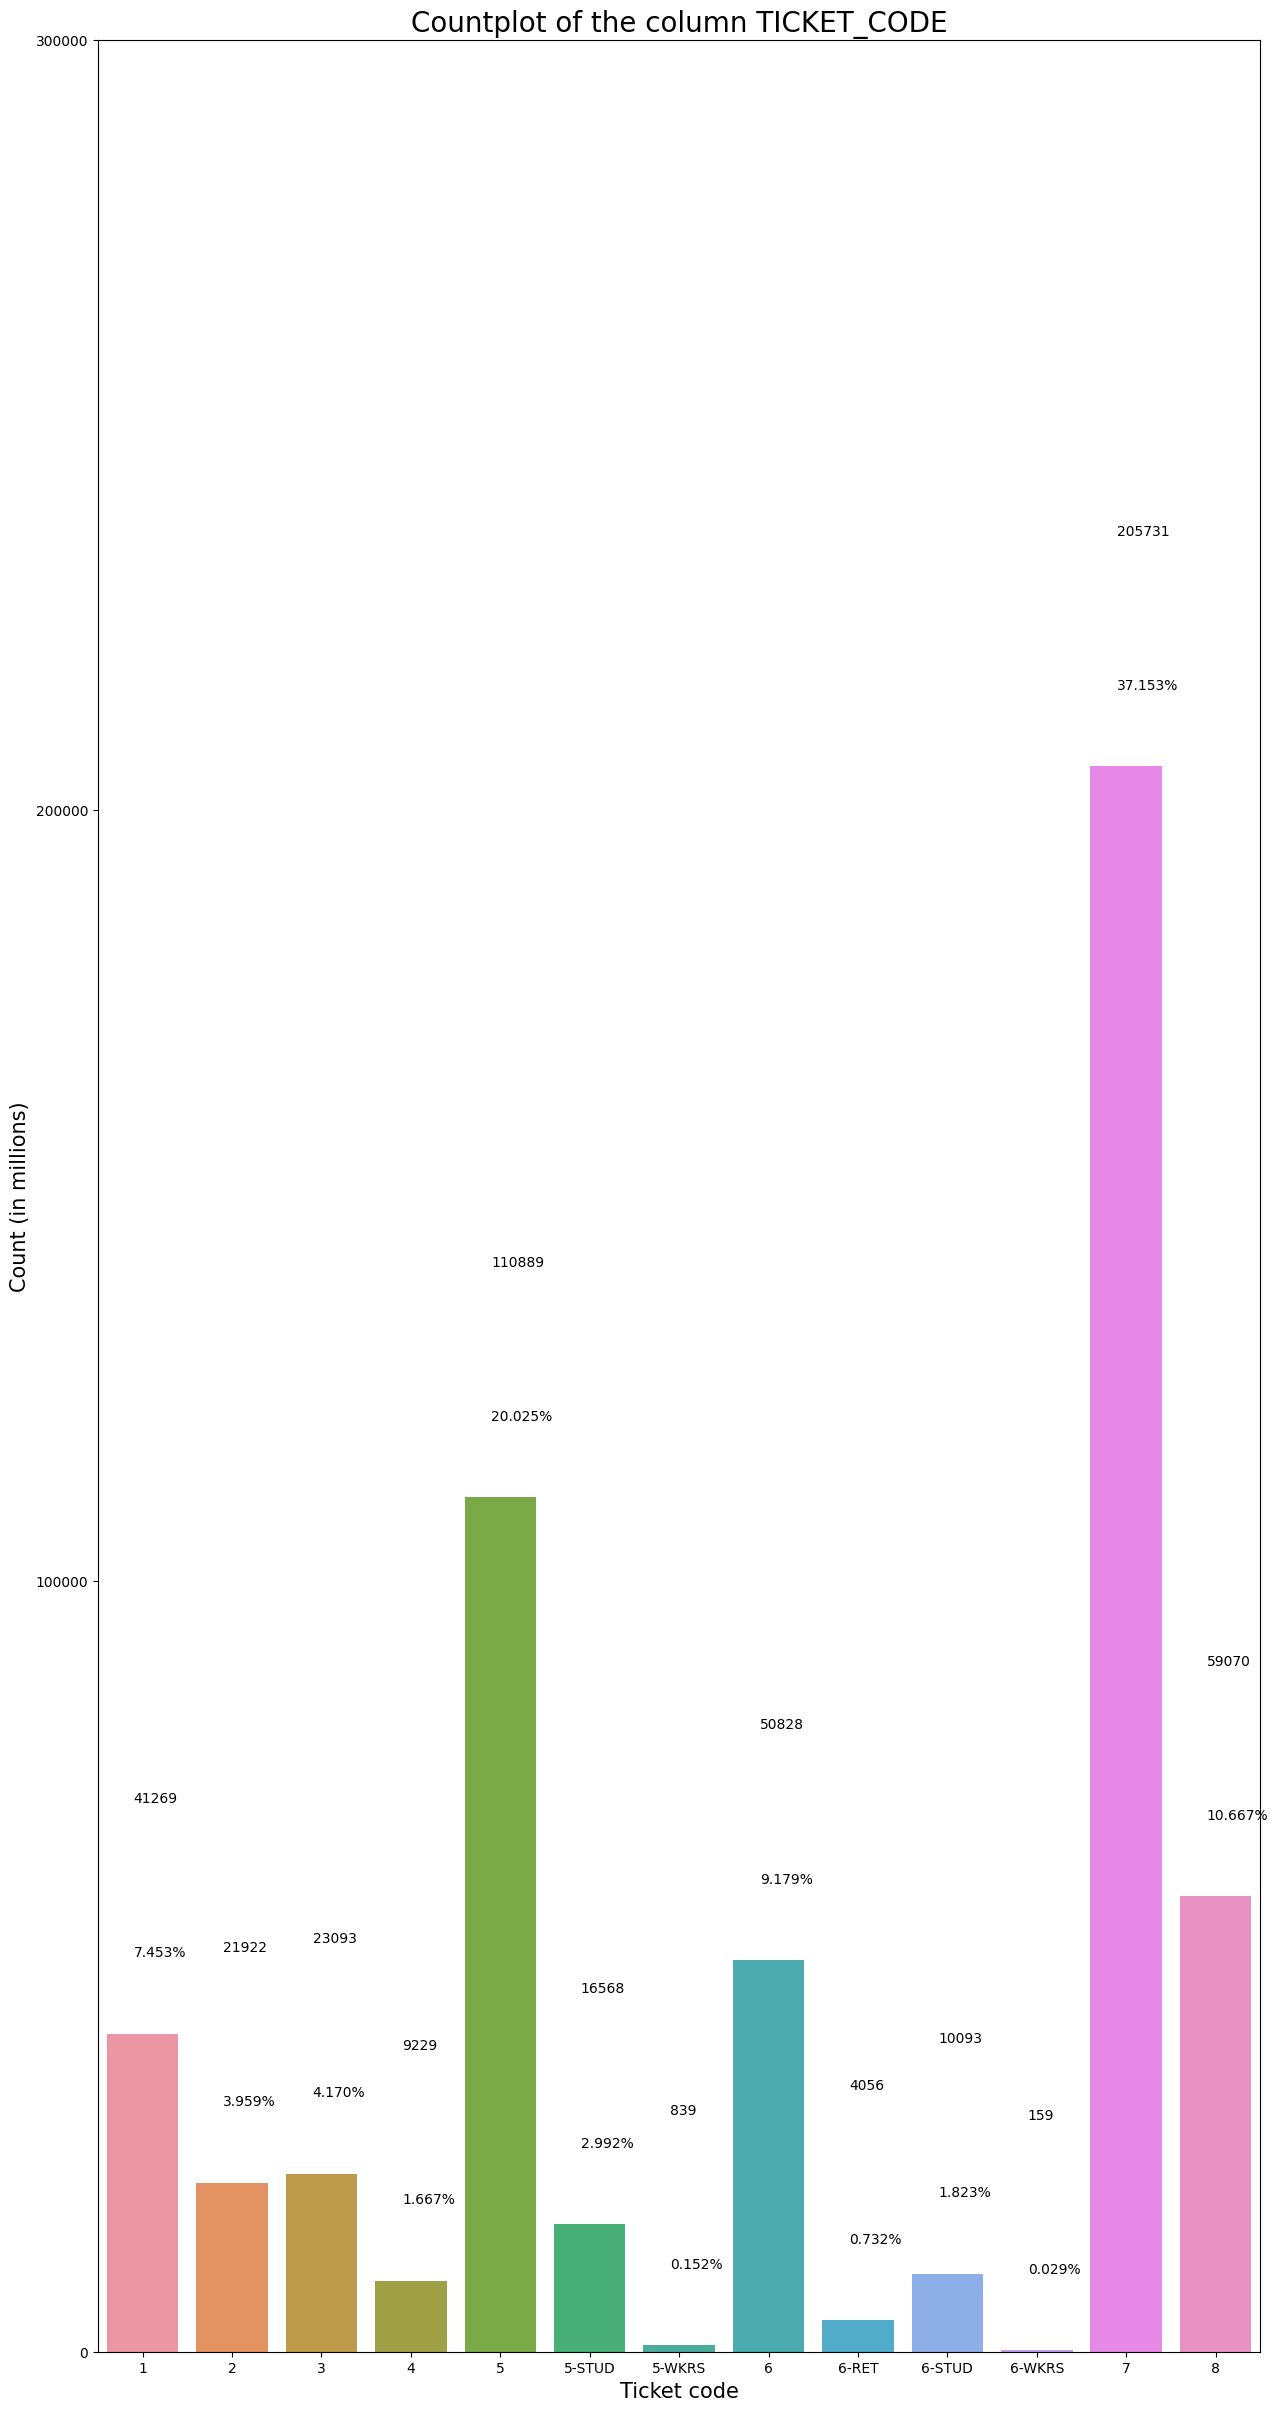

In [65]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

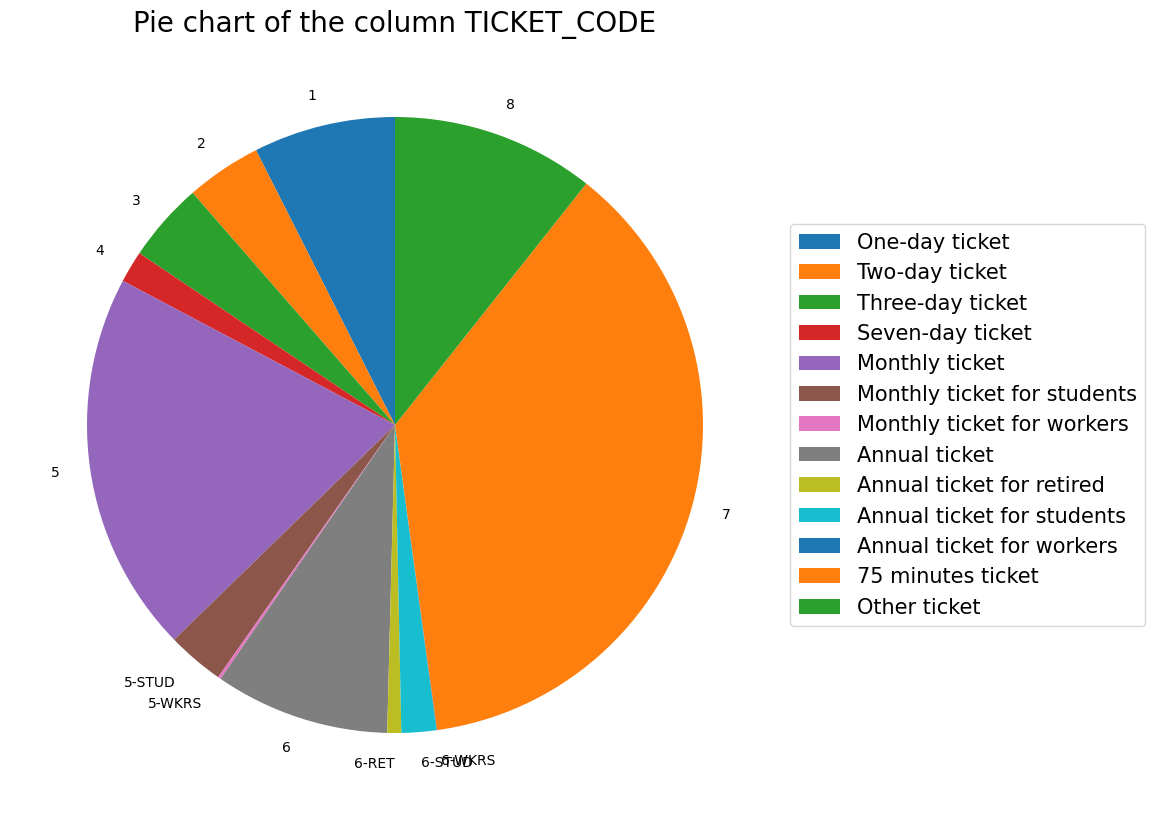

In [66]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(startangle=90)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 8 (other tickets) 

In [67]:
shape_before = df.shape[0]

# Delete 7b tickets because they are not useful for the analysis 
df = df[df['TICKET_CODE'] != '8']

# Print the number of rows before and after the deletion of the 8 tickets and the difference
print('The number of rows before the deletion of the 8 tickets is: {}'.format(shape_before))
print('The number of rows after the deletion of the 8 tickets is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))

# TODO: to de-comment later

The number of rows before the deletion of the 8 tickets is: 553746
The number of rows after the deletion of the 8 tickets is: 494676
The difference is: 59070


## Data Cleaning

### Useless stamps

In [68]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata

In [69]:
# Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
dict_serial = {}
for ticket in df['TICKET_CODE'].unique():
    dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# Print the serial with the hightest number of validations, and the same for each ticket profile
for ticket in df['TICKET_CODE'].unique():
    print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

The serial with the hightest number of validations for the ticket profile 7 is: -3613119990
The serial with the hightest number of validations for the ticket profile 5-STUD is: -3619112366
The serial with the hightest number of validations for the ticket profile 6-STUD is: -3613076330
The serial with the hightest number of validations for the ticket profile 5 is: -2821768344
The serial with the hightest number of validations for the ticket profile 6 is: -2855011795
The serial with the hightest number of validations for the ticket profile 1 is: 36369814781499652
The serial with the hightest number of validations for the ticket profile 2 is: 40551647001685764
The serial with the hightest number of validations for the ticket profile 3 is: 37267502129437188
The serial with the hightest number of validations for the ticket profile 4 is: 40552758050967812
The serial with the hightest number of validations for the ticket profile 6-RET is: -3613089913
The serial with the hightest number of val

In [70]:
# Group by the serial and the fermata 
df = df.groupby(['SERIALE', 'FERMATA']).apply(lambda x: x.sort_values(by='DATA_VALIDAZIONE', ascending=True))

# Print the first 5 rows of the df
df.head()

DATA       ORA    DATA_VALIDAZIONE  \
SERIALE     FERMATA                                                   
-4090155923 5072    54424  2023-01-13  16:23:00 2023-01-13 16:23:00   
-4090155919 5028    468222 2023-01-19  17:00:00 2023-01-19 17:00:00   
            5094    243928 2023-01-16  12:55:00 2023-01-16 12:55:00   
                    311715 2023-01-17  13:05:00 2023-01-17 13:05:00   
                    311716 2023-01-17  13:05:00 2023-01-17 13:05:00   

                               SERIALE  FERMATA   DESCRIZIONE  TITOLO  \
SERIALE     FERMATA                                                     
-4090155923 5072    54424  -4090155923     5072      Chioggia   21403   
-4090155919 5028    468222 -4090155919     5028  P.le Roma "E   21403   
            5094    243928 -4090155919     5094  Lido S.M.E.    21403   
                    311715 -4090155919     5094  Lido S.M.E.    21403   
                    311716 -4090155919     5094  Lido S.M.E.    21403   

                           TICKET_CODE           DESCRIZIONE_TITOLO  
SERIALE     FERMATA                                                  
-4090155923 5072    54424        6-RET  ABBONAMENTO PENSIONATI ACTV  
-4090155919 5028    468222       6-RET  ABBONAMENTO PENSIONATI ACTV  
            5094    243928       6-RET  ABBONAMENTO PENSIONATI ACTV  
                    311715       6-RET  ABBONAMENTO PENSIONATI ACTV  
                    311716       6-RET  ABBONAMENTO PENSIONATI ACTV

In [71]:
# Reset the index of the df and drop the old index in order to have a new index starting from 0 to the number of rows
# It is necessary to have a new index because the groupby function has created a multi-index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Create a new column 'MIN_TEMPORAL_GAP' that contains the minimum temporal gap between two validations for the same serial and fermata in minutes
df = df.groupby(['SERIALE', 'FERMATA','DATA']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))

In [ ]:
df.head(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
0,2022-05-16,08:31:00,2022-05-16 08:31:00,36031244634932740,2749,Treviso,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
1,2022-05-16,08:41:00,2022-05-16 08:41:00,36031244634932740,6081,MESTRE CENTR,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
2,2022-05-15,17:22:00,2022-05-15 17:22:00,36060797649139716,5013,San Marco-Sa,11101,7a,"75'-Tpl 6,64-ComVe0,86",NaN
3,2022-05-15,17:27:00,2022-05-15 17:27:00,36060797649139716,5032,"FERROVIA ""B""",11101,7a,"75'-Tpl 6,64-ComVe0,86",NaN
4,2022-05-15,15:21:00,2022-05-15 15:21:00,36062264383476484,5031,"P.le Roma ""G",11101,7a,"75'-Tpl 6,64-ComVe0,86",NaN
5,2022-05-13,07:17:00,2022-05-13 07:17:00,36062329073519108,3581,Cappelletta,14122,7b,Extra tratta 2,NaN
6,2022-05-18,08:54:00,2022-05-18 08:54:00,36062329073913348,2609,Noale,14124,7b,Extra tratta 4,NaN
7,2022-05-16,07:13:00,2022-05-16 07:13:00,36062329074176004,3363,Moniego Trev,14122,7b,Extra tratta 2,NaN
8,2022-05-17,07:19:00,2022-05-17 07:19:00,36062329074435076,2609,Noale,14122,7b,Extra tratta 2,NaN
9,2022-05-17,07:19:00,2022-05-17 07:19:00,36062329074435076,2609,Noale,14122,7b,Extra tratta 2,0.0


In [ ]:
df.tail(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
505644,2022-05-15,12:13:00,2022-05-15 12:13:00,65676973862190853,5072,Chioggia Pia,11222,7b,Tariffa carozzina,NaN
505645,2022-05-13,13:31:00,2022-05-13 13:31:00,65676974331559685,8029,Fisica Depos,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505646,2022-05-13,15:18:00,2022-05-13 15:18:00,65676974331559685,8029,Fisica Depos,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,107.0
505647,2022-05-14,08:22:00,2022-05-14 08:22:00,65676974609431813,283,Don Sturzo V,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505648,2022-05-19,10:14:00,2022-05-19 10:14:00,65676975409889029,3320,Sottomarina,15114,7b,Carnet CHIOGGIA 10c. TICKET,NaN
505649,2022-05-16,15:23:00,2022-05-16 15:23:00,65676975947021061,162,Stazione MES,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505650,2022-05-13,09:48:00,2022-05-13 09:48:00,65676976708154117,2515,Ospedale Mir,14122,7b,Extra tratta 2,NaN
505651,2022-05-15,20:13:00,2022-05-15 20:13:00,65676977554880773,6084,VENEZIA CORS,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505652,2022-05-14,08:39:00,2022-05-14 08:39:00,65677030157024261,6080,MESTRE CENTR,12101,7a,Bigl.Aut.75'Mestre/Lido-tsc,NaN
505653,2022-05-19,13:52:00,2022-05-19 13:52:00,65677033610311173,33,Miranese Laz,14123,7b,Extra tratta 3,NaN


In [ ]:
df['MIN_TEMPORAL_GAP'].value_counts()

0.0       15638
1.0        3708
2.0        2310
3.0        1562
4.0        1093
5.0         851
6.0         629
7.0         571
8.0         480
9.0         432
10.0        398
11.0        283
12.0        248
13.0        223
14.0        198
15.0        188
18.0        168
19.0        162
17.0        137
16.0        131
20.0         95
21.0         86
23.0         74
24.0         74
22.0         69
25.0         68
28.0         61
27.0         58
30.0         56
26.0         47
29.0         46
395.0        40
340.0        38
31.0         37
458.0        37
453.0        35
475.0        35
248.0        34
35.0         34
32.0         34
41.0         33
346.0        33
341.0        33
449.0        32
462.0        32
476.0        31
265.0        31
293.0        30
419.0        30
63.0         30
441.0        30
326.0        30
214.0        30
408.0        30
236.0        30
259.0        29
435.0        29
281.0        29
558.0        29
412.0        29
222.0        29
274.0        29
287.0   

In [ ]:
# How many rows have a minimum temporal gap equal to NaN?
df[df['MIN_TEMPORAL_GAP'].isna()].shape[0]

464642

In [ ]:
# Cleaning operation: remove the rows using the minimum temporal gap

print('The minimum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].min()))
print('The value of the 50% percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.5)))

shape_before = df.shape[0]

# Delete the rows that have a minimum temporal gap for the same serial and fermata less than the value of the 50% percentile
# Do not remove the rows with NaN values because they are the first validations of the day of a specific serial and fermata usefull for the analysis
df = df[(df['MIN_TEMPORAL_GAP'] > df['MIN_TEMPORAL_GAP'].quantile(0.5)) | (df['MIN_TEMPORAL_GAP'].isna())]

# Print the number of rows before and after the cleaning operation and the difference
print('The number of rows before the cleaning operation is: {}'.format(shape_before))
print('The number of rows after the cleaning operation is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))
# Calculate the percentage of rows that has just been deleted
print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df.shape[0])/shape_before*100, 2)))

The minimum value of the column MIN_TEMPORAL_GAP is: 0.0
The value of the 50% percentile of the column MIN_TEMPORAL_GAP is: 2.0
The number of rows before the cleaning operation is: 505664
The number of rows after the cleaning operation is: 484008
The difference is: 21656
The percentage of rows that has just been deleted is: 4.28%


### Stops similar

In [73]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

The number of unique values in the column DESCRIZIONE is: 696


In [74]:
# Define a function that returns the common prefix of a list of strings
def get_common_prefix(string_list):
    # input di tipo  string_list = ["Mestre Centro", "Mirano Centro"]
    first_prefix = string_list[0].split(" ")[0]
    # create and empty dictionary
    prefix_dict = {}

    for string in string_list[1:]:
        if not string.startswith(first_prefix):
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict
    

In [75]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [76]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

P.LE: ['P.LE ROMA "E', 'P.LE ROMA "G', 'P.LE ROMA "A', 'P.LE ROMA "B', 'P.LE ROMA "C', 'P.LE ROMA "F', 'P.LE ROMA "D']
LIDO: ['LIDO S.M.E. ', 'LIDO S. NICO']
TREPORTI: ['TREPORTI']
F.TE: ['F.TE NOVE "A', 'F.TE NOVE "C', 'F.TE NOVE "D', 'F.TE NOVE "B']
BURANO: ['BURANO "C"', 'BURANO "A"', 'BURANO "B"']
S.: ['S. MARCO-SAN', 'S. TOMA\' "B"', 'S.ELENA-STAD', 'S. MARCUOLA-', 'S. PIETRO DI', 'S. STAE', 'S. SILVESTRO', 'S. MARTA', 'S. MARCO VAL', 'S. ANGELO', 'S. MARIA DEL', 'S. BASILIO', 'S. MARCO (GI', 'S. ERASMO CH', 'S. ALVISE', 'S. ERASMO PU', 'S. SAMUELE', 'S. GIORGIO', 'S. ERASMO CA', 'S. SERVOLO', 'S. MARCO GIA', 'S. LAZZARO', 'S. TOMA\' "A"']
TRIESTE: ['TRIESTE CATE', 'TRIESTE ERAC', 'TRIESTE ROBI', 'TRIESTE BOSC', 'TRIESTE MIRA', 'TRIESTE MAZZ', 'TRIESTE PARC']
CELESTIA: ['CELESTIA']
MALAMOCCO: ['MALAMOCCO OC', 'MALAMOCCO BE', 'MALAMOCCO CE', 'MALAMOCCO AL', 'MALAMOCCO BA', 'MALAMOCCO ST', 'MALAMOCCO PA', 'MALAMOCCO GA']
PUNTA: ['PUNTA SABBIO']
SAN: ["SAN DONA' RI", "SANT'ANTONIO", 

#### Update some keys in the dictionary

In [77]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [78]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

The values of the dictionary with the key S. are: ['S. MARCO-SAN', 'S. TOMA\' "B"', 'S.ELENA-STAD', 'S. MARCUOLA-', 'S. PIETRO DI', 'S. STAE', 'S. SILVESTRO', 'S. MARTA', 'S. MARCO VAL', 'S. ANGELO', 'S. MARIA DEL', 'S. BASILIO', 'S. MARCO (GI', 'S. ERASMO CH', 'S. ALVISE', 'S. ERASMO PU', 'S. SAMUELE', 'S. GIORGIO', 'S. ERASMO CA', 'S. SERVOLO', 'S. MARCO GIA', 'S. LAZZARO', 'S. TOMA\' "A"']
The values of the dictionary with the key San are: ["SAN DONA' RI", "SANT'ANTONIO", 'SAN MARCO-SA', 'SAN MARCO MU', "SAN DONA' PA", "SAN DONA' VA", 'SAN MARCO MA', "SAN DONA' CE", 'SANTA MARIA ', 'SAN MARCO FO', 'SAN MARCO SA', 'SAN MARCO CA', 'SAN MARCO MO', "SAN DONA' PI", "SAN DONA' FA", "SAN DONA' MA", 'SAN ROCCO BR', 'SAN MARCO BO', 'SAN LIBERALE', "SAN DONA' PE", 'SANPIETRO CA', 'SANSOVINO VE', 'SAN PIETRO B', "SAN NICOLO' ", 'SANT´ANNA S', 'SANTA MARGHE', "SAN NICOLO'", 'SAN PIETRO P', 'SAN PIETRO C']


##### S.Erasmo

In [79]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

The values of the dictionary with the key S.ERASMO are: ['S. ERASMO PU']


##### San Marco

In [80]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

The values of the dictionary with the key San Marco are: ['SAN MARCO-SA', 'SAN MARCO MU', 'SAN MARCO MA', 'SAN MARCO FO', 'SAN MARCO SA', 'SAN MARCO CA', 'SAN MARCO MO', 'SAN MARCO BO', 'S. MARCO (GI']


##### San Dona'

In [81]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

The values of the dictionary with the key San Dona are: ["SAN DONA' RI", "SAN DONA' PA", "SAN DONA' VA", "SAN DONA' CE", "SAN DONA' PI", "SAN DONA' FA", "SAN DONA' MA", "SAN DONA' PE"]


#### San Pietro

In [82]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

The values of the dictionary with the key San Pietro are: ['SANPIETRO CA', 'SAN PIETRO B', 'SAN PIETRO P', 'SAN PIETRO C', 'S. PIETRO DI']


#### Ca' Rossa

In [83]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

The values of the dictionary with the key Ca' Rossa are: ["CA' ROSSA BI", "CA' ROSSA SE", "CA' ROSSA OB", "CA' ROSSA VO"]


##### Manage the remaining values in the keys 'S.' and 'San' and others

In [85]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
for value in dict_prefix['S.']:
    dict_prefix[value] = [value]

for value in dict_prefix['SAN']:
    dict_prefix[value] = [value]

for value in dict_prefix['SANTA']:
    dict_prefix[value] = [value]

# for value in dict_prefix['SANT\'']:
    # dict_prefix[value] = [value]

for value in dict_prefix['CA\'']:
    dict_prefix[value] = [value]

for value in dict_prefix['PIAZZA']:
    dict_prefix[value] = [value]

for value in dict_prefix['PIAZZALE']:
    dict_prefix[value] = [value]

for value in dict_prefix['VIA']:
    dict_prefix[value] = [value]

for value in dict_prefix['STAZIONE']:
    dict_prefix[value] = [value]

for value in dict_prefix['TREVISO']:
    dict_prefix[value] = [value]

for value in dict_prefix['TRENTO']:
    dict_prefix[value] = [value]

# for value in dict_prefix['INCR.']:
    # dict_prefix[value] = [value]

# for value in dict_prefix['DE']:
    # dict_prefix[value] = [value]



# Remove the keys 'S.' and 'San' witout printing the values
dict_prefix.pop('S.')
dict_prefix.pop('SAN')
dict_prefix.pop('SANTA')
# dict_prefix.pop('SANT\'')
dict_prefix.pop('CA\'')
dict_prefix.pop('PIAZZA')
dict_prefix.pop('PIAZZALE')
dict_prefix.pop('VIA')
dict_prefix.pop('STAZIONE')
dict_prefix.pop('TREVISO')
dict_prefix.pop('TRENTO')
# dict_prefix.pop('INCR.')
# dict_prefix.pop('DE')

['TRENTO FAGAR', 'TRENTO GAZZE', 'TRENTO PODGO']

#### Treviso and Trento

In [86]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

The values of the dictionary with the key Tre are: ['TRE ARCHI']


#### Keys with only an item

In [87]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [88]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

LIDO: ['LIDO S.M.E. ', 'LIDO S. NICO']
BURANO: ['BURANO "C"', 'BURANO "A"', 'BURANO "B"']
TRIESTE: ['TRIESTE CATE', 'TRIESTE ERAC', 'TRIESTE ROBI', 'TRIESTE BOSC', 'TRIESTE MIRA', 'TRIESTE MAZZ', 'TRIESTE PARC']
MALAMOCCO: ['MALAMOCCO OC', 'MALAMOCCO BE', 'MALAMOCCO CE', 'MALAMOCCO AL', 'MALAMOCCO BA', 'MALAMOCCO ST', 'MALAMOCCO PA', 'MALAMOCCO GA']
CHIOGGIA: ['CHIOGGIA', 'CHIOGGIA CAM', 'CHIOGGIA SAN', 'CHIOGGIA BER', 'CHIOGGIA VIA', 'CHIOGGIA ISO', 'CHIOGGIA STA', 'CHIOGGIA PAR', 'CHIOGGIA RID', 'CHIOGGIA VAL', 'CHIOGGIA NEN']
VENEZIA: ['VENEZIA', 'VENEZIA CORS', 'VENEZIA PIAZ', 'VENEZIA RAMP']
MESTRE: ['MESTRE CENTR', 'MESTRE VIA H', 'MESTRE PIAZZ', 'MESTRE VIA T', 'MESTRE RAMPA', 'MESTRE VIA M', 'MESTRE VIA P', 'MESTRE VIA A', 'MESTRE STAZI']
GAGGIO: ['GAGGIO CIMIT', 'GAGGIO', 'GAGGIO FERMI']
GIARDINI: ['GIARDINI BIE', 'GIARDINI "B"', 'GIARDINI "A"']
RIALTO: ['RIALTO "C"', 'RIALTO "B"', 'RIALTO "D"', 'RIALTO MERCA', 'RIALTO "A"']
OSPEDALE: ['OSPEDALE DEL', 'OSPEDALE MIR', 'OSPEDALE

In [89]:
# Export the dictionary in a json file
name_file = 'dict_prefix_' + file_name.split('.')[0] + '.json'
with open('data/dictionaries/' + name_file, 'w') as fp:
    json.dump(dict_prefix, fp)

In [90]:
# Create a new dataframe, copied from the original one
df_new = df.copy() 

# Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
for key, value in dict_prefix.items():
    df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# Print the head of the new dataframe
print(df_new.head())

# Export the new dataframe in a txt file
# The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
name_file = 'dataset_cleaned_' + file_name.split('.')[0] + '.txt'
df_new.to_csv('data/processed/' + name_file, sep='\t', index=False)

print('The script has finished')

        DATA       ORA    DATA_VALIDAZIONE     SERIALE  FERMATA DESCRIZIONE  \
0 2023-01-13  16:23:00 2023-01-13 16:23:00 -4090155923     5072    CHIOGGIA   
1 2023-01-19  17:00:00 2023-01-19 17:00:00 -4090155919     5028   P.LE ROMA   
2 2023-01-16  12:55:00 2023-01-16 12:55:00 -4090155919     5094        LIDO   
3 2023-01-17  13:05:00 2023-01-17 13:05:00 -4090155919     5094        LIDO   
4 2023-01-17  13:05:00 2023-01-17 13:05:00 -4090155919     5094        LIDO   

   TITOLO TICKET_CODE           DESCRIZIONE_TITOLO  
0   21403       6-RET  ABBONAMENTO PENSIONATI ACTV  
1   21403       6-RET  ABBONAMENTO PENSIONATI ACTV  
2   21403       6-RET  ABBONAMENTO PENSIONATI ACTV  
3   21403       6-RET  ABBONAMENTO PENSIONATI ACTV  
4   21403       6-RET  ABBONAMENTO PENSIONATI ACTV  
The script has finished
